In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('fake-news/train.csv')

In [3]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
X = df.drop('label', axis = 1) #get the independent feature

In [5]:
X.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


In [6]:
#get the dependent feature
y = df['label']
y.head()

0    1
1    0
2    1
3    1
4    1
Name: label, dtype: int64

In [7]:
df.shape

(20800, 5)

In [10]:
df = df.dropna()
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [11]:
#copy the dataframe
messages = df.copy()

In [12]:
messages.reset_index(inplace=True) #after dropping the null values, some indices may be lost, so we want the indexes to be in order
messages.head(10)

,index,id,title,author,text,label
0,0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
7,9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
8,10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
9,11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [13]:
#instead of focusing on the title as we did in the count vectorizer, we will focus on the text
messages['text'][6]

'PARIS  —   France chose an idealistic, traditional   candidate in Sunday’s primary to represent the Socialist and   parties in the presidential election this spring. The candidate, Benoît Hamon, 49, who ran on the slogan that he would “make France’s heart beat,” bested Manuel Valls, the former prime minister, whose campaign has promoted more   policies and who has a strong    background. Mr. Hamon appeared to have won by a wide margin, with incomplete returns showing him with an estimated 58 percent of the vote to Mr. Valls’s 41 percent. “Tonight the left holds its head up high again it is looking to the future,” Mr. Hamon said, addressing his supporters. “Our country needs the left, but a modern, innovative left,” he said. Mr. Hamon’s victory was the clearest sign yet that voters on the left want a break with the policies of President François Hollande, who in December announced that he would not seek  . However, Mr. Hamon’s strong showing is unlikely to change widespread assessments

In [14]:
import os
import re

# Define the path to the directory containing the files
directory_path = '/Users/palakprashant/Fake_News_Classifier/Fake_News_Classifier/stopwords/english'

# Initialize an empty list to store the words
words_list = []

# Open and read the file
with open(directory_path, 'r', encoding='utf-8') as file:
    file_contents = file.read()
    
    # Extract words using regular expressions
    words = file_contents.split()
    
    # Append the words to the list
    words_list.extend(words)

# Print the list of words
print(words_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [15]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#read each and every text in the dataset and apply this:
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['text'][i]) #in all rows of the text feature, replace all characters EXCEPT a-z and A-Z by a blank space
    review = review.lower() #make all the text in lowercase
    review = review.split() #we are using a split because after this we will apply the stop keywords and the stemming
    review = [ps.stem(word) for word in review if not word in words_list] #only include words that are not stop words
    corpus.append(' '.join(review)) # Join the words back into a single string


In [16]:
corpus[3]

'video civilian kill singl us airstrik identifi rate civilian kill american airstrik afghanistan higher us engag activ combat oper photo hellfir missil load onto us militari reaper drone afghanistan staff sgt brian ferguson u air forc bureau abl identifi civilian kill singl us drone strike afghanistan last month biggest loss civilian life one strike sinc attack medecin san frontier hospit msf last octob us claim conduct counter terror strike islam state fighter hit nangarhar provinc missil septemb next day unit nation issu unusu rapid strong statement say strike kill civilian injur other gather hous celebr tribal elder return pilgrimag mecca bureau spoke man name haji rai said owner hous target said peopl kill other injur provid name list bureau abl independ verifi ident die rai son headmast local school among anoth man abdul hakim lost three son attack rai said involv deni us claim member visit hous strike said even speak sort peopl phone let alon receiv hous death amount biggest conf

## TF-IDF Vectorizer ##

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect = TfidfVectorizer(max_features=5000, ngram_range=(1,3)) #take the most frequent 5000 words with ngram range of 1-3 to get combinations as well
X = tfidf_vect.fit_transform(corpus).toarray()

In [20]:
X.shape

(18285, 5000)

In [21]:
y = messages['label']

In [23]:
#Divide data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [24]:
tfidf_vect.get_feature_names_out()[:20] #these are our feature names

array(['aaron', 'abandon', 'abc', 'abe', 'abedin', 'abil', 'abl', 'abort',
       'abroad', 'absenc', 'absolut', 'absorb', 'absurd', 'abu', 'abus',
       'academ', 'academi', 'acceler', 'accept', 'access'], dtype=object)

In [26]:
#we get info about the algorithm we have defined regarding TF-IDF. what we applied during TF-IDF:
tfidf_vect.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [28]:
count_df = pd.DataFrame(X_train, columns = tfidf_vect.get_feature_names_out())
count_df.head()

,aaron,abandon,abc,abe,abedin,abil,abl,abort,abroad,absenc,...,young,young peopl,younger,youth,youtub,zero,zika,zionist,zone,zu
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.017174,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.025582,0.0,0.0,0.0247,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.023192,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0000,0.0


In [29]:
import matplotlib.pyplot as plt

In [30]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Multinomial Naive Bayes Algorithm ##

In [36]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()

In [37]:
from sklearn import metrics
import numpy as np
import itertools

accuracy:  0.9017499088589136
Confusion matrix, without normalization


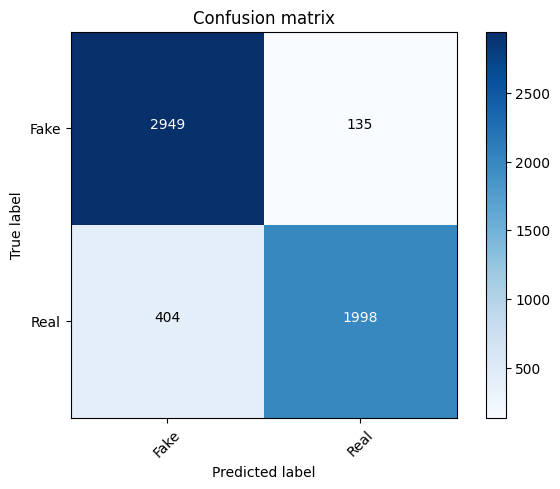

In [39]:
classifier.fit(X_train, y_train)
prediction = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, prediction)
print("accuracy: ", score)
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes = ['Fake', 'Real'])
#False positives and negatives are less

## Passive Aggressive Classifier Algorithm ##

accuracy:  0.9485964272694131
Confusion matrix, without normalization


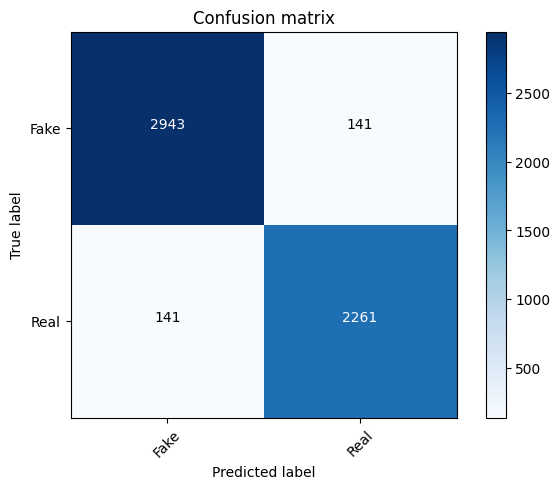

In [42]:
from sklearn.linear_model import PassiveAggressiveClassifier #works very well on text data
linear_classifier = PassiveAggressiveClassifier(max_iter = 50)
linear_classifier.fit(X_train, y_train)
prediction_pac = linear_classifier.predict(X_test)
score_pac = metrics.accuracy_score(y_test, prediction_pac)
print("accuracy: ", score_pac)
cm_pac = metrics.confusion_matrix(y_test, prediction_pac)
plot_confusion_matrix(cm_pac, classes = ['Fake', 'Real'])
#False positives and negatives are very less. works much better than multinomial naive bayes model

## Multinomial Classifier with Hyperparameter Tuning ##

In [43]:
classifier = MultinomialNB(alpha = 0.1)
previous_score = 0
for alpha in np.arange(0, 1, 0.1): #getting alpha from 0 to 1 in steps of 0.1
    sub_classifier = MultinomialNB(alpha = alpha)
    sub_classifier.fit(X_train, y_train)
    y_pred = sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score > previous_score:
        classifier =  sub_classifier # replace the classifier with the sub classifier
    print("Alpha: {}, Score: {}". format(alpha, score))

/Users/palakprashant/Fake_News_Classifier/Fake_News_Classifier/.venv/lib/python3.13/site-packages/sklearn/naive_bayes.py:890: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = np.log(smoothed_fc) - np.log(


Alpha: 0.0, Score: 0.5621582209259934
Alpha: 0.1, Score: 0.9019321910317171
Alpha: 0.2, Score: 0.9022967553773241
Alpha: 0.30000000000000004, Score: 0.9019321910317171
Alpha: 0.4, Score: 0.9026613197229311
Alpha: 0.5, Score: 0.9022967553773241
Alpha: 0.6000000000000001, Score: 0.9019321910317171
Alpha: 0.7000000000000001, Score: 0.9021144732045207
Alpha: 0.8, Score: 0.9015676266861101
Alpha: 0.9, Score: 0.9017499088589136


In [45]:
#Get feature names
features = tfidf_vect.get_feature_names_out()
features

array(['aaron', 'abandon', 'abc', ..., 'zionist', 'zone', 'zu'],
      dtype=object)

Getting the most real and fake words using the Passive Aggressive Classifier:

In [46]:
linear_classifier.coef_[0] #the most negative value is the fakest value, the least negative value is the most real word

array([-1.4670861 , -0.38389307,  0.65266956, ..., -1.96188726,
       -0.05614009,  0.45943114])

In [49]:
## Most real words:
sorted(zip(linear_classifier.coef_[0], features), reverse = True)[:100]

[(np.float64(15.859491111780954), 'anti'),
 (np.float64(15.360095321860873), 'octob'),
 (np.float64(12.203456540085025), 'novemb'),
 (np.float64(11.575764336671089), 'non'),
 (np.float64(10.459572096958244), 'co'),
 (np.float64(10.404955167530645), 'year old'),
 (np.float64(10.286205382018832), 'self'),
 (np.float64(7.991017727781471), 'via'),
 (np.float64(7.54823035843339), 'sourc'),
 (np.float64(7.462873678419805), 'howev'),
 (np.float64(7.018851047312323), 'presid elect'),
 (np.float64(6.582140640590135), 'hillari'),
 (np.float64(6.373901888909714), 'click'),
 (np.float64(5.84615434330795), 'us'),
 (np.float64(5.728416642438469), 'comment'),
 (np.float64(5.60594201256906), 'twitter com'),
 (np.float64(5.533549218661144), 'share'),
 (np.float64(5.436822864401491), 'print'),
 (np.float64(5.405718012302047), 'nov'),
 (np.float64(5.3955437937110755), 'al'),
 (np.float64(5.2167190675897555), 'pic twitter com'),
 (np.float64(5.00671419244443), 'com'),
 (np.float64(4.944004808490674), 'pro

In [52]:
## Most fake words:
sorted(zip(linear_classifier.coef_[0], features))[:100]

[(np.float64(-10.856028761337553), 'breitbart'),
 (np.float64(-10.846863993601119), 'twitter'),
 (np.float64(-9.15928622859038), 'presid donald trump'),
 (np.float64(-9.146671369138412), 'presid donald'),
 (np.float64(-8.662159910864279), 'presid trump'),
 (np.float64(-8.353786968582984), 'said'),
 (np.float64(-7.822743525826103), 'mr'),
 (np.float64(-6.867318870043336), 'ms'),
 (np.float64(-6.840706712873797), 'milo'),
 (np.float64(-6.4552581762709424), 'last year'),
 (np.float64(-6.314851580711162), 'follow'),
 (np.float64(-5.434141048248898), 'friday'),
 (np.float64(-5.248802100102902), 'follow twitter'),
 (np.float64(-5.238712703133868), 'episod'),
 (np.float64(-5.205205169695401), 'dr'),
 (np.float64(-5.088011011775926), 'todd'),
 (np.float64(-5.0695686470508), 'jeff'),
 (np.float64(-5.031865674066916), 'ian'),
 (np.float64(-4.75979573802221), 'breitbart com'),
 (np.float64(-4.7370805687093505), 'hudson'),
 (np.float64(-4.726899753241853), 'saturday'),
 (np.float64(-4.415442767336